Nama : Robiul Awal
<br>
Kampus : Universitas Negeri Yogyakarta


# Import Library

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score, f1_score, matthews_corrcoef, roc_curve, auc
import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from imblearn.over_sampling import RandomOverSampler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore")

import os

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import dataset

In [3]:
df = pd.read_csv('/content/ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Cleaning dataset

In [4]:
df.columns = df.columns.str.replace('[', '').str.replace(']', '')

df.head()

,UDI,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature K,10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature K,10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed rpm,10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque Nm,10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear min,10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [6]:
# Handling invalid data

df.replace("?",np.nan,inplace=True)
for column in df.columns:
    try:
        df[column]=df[column].astype(float)
    except:
        pass

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
df.head()

,UDI,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1.0,M14860,M,298.1,308.6,1551.0,42.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,L47181,L,298.2,308.7,1408.0,46.3,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,L47182,L,298.1,308.5,1498.0,49.4,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,L47183,L,298.2,308.6,1433.0,39.5,7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,L47184,L,298.2,308.7,1408.0,40.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.drop(['UDI','Product ID','TWF','HDF','PWF','OSF','RNF','Type'],axis=1,inplace=True)
list(df)

['Air temperature K',
 'Process temperature K',
 'Rotational speed rpm',
 'Torque Nm',
 'Tool wear min',
 'Machine failure']

In [9]:
df = pd.get_dummies(df,drop_first=True)
features = list(df.columns)
df_group = df.groupby(['Machine failure'])

In [10]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df.fillna({feature : df[feature].mean()}, inplace=True)
    except:
        try:
            df.fillna({feature : df[feature].mode()}, inplace=True)
        except:
            pass

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature K,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature K,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed rpm,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque Nm,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear min,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


# Normalisasi

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prediction

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluasi Model

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [26]:
# Set a new threshold
threshold = 0.45
y_pred_new = (y_pred_proba >= threshold).astype(int)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [28]:
print(f'Akurasi: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Akurasi: 0.966
Confusion Matrix:
[[1932    0]
 [  68    0]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1932
         1.0       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



Bisa dilihat bahwa hasil evaluasi model berada di akurasi kebenaran 96.6%

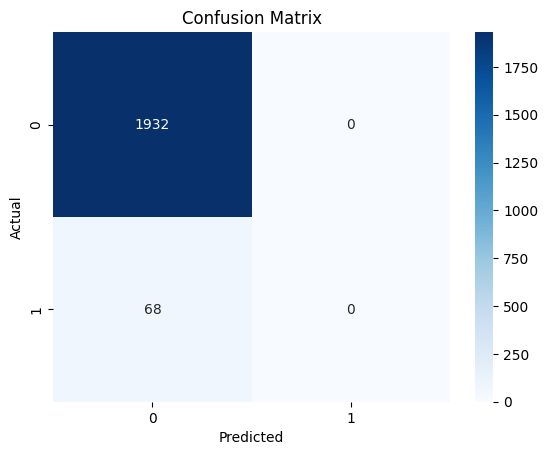

In [29]:
# Plot Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()